In [0]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from google.colab import files
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'
import seaborn as sns

In [0]:
url = 'https://www.mhlw.go.jp/stf/houdou/houdou_list_202002.html'

In [0]:
html_doc = requests.get('https://www.mhlw.go.jp/stf/houdou/houdou_list_202002.html').content

In [0]:
soup = BeautifulSoup(html_doc, 'html.parser')

In [0]:
a_tags = soup.find_all('a')

In [0]:
columns = []
main_df = pd.DataFrame(columns=columns)

In [0]:
main_df

""


In [0]:
links = []
for a in a_tags:
  # print(a.text)
  if "新型コロナウイルス感染症の現在の状況と厚生労働省の対応について" in a.text:
    link = "https://www.mhlw.go.jp" + a.get('href')
    links.append(link)

In [0]:
links

['https://www.mhlw.go.jp/stf/newpage_09849.html',
 'https://www.mhlw.go.jp/stf/newpage_09815.html',
 'https://www.mhlw.go.jp/stf/newpage_09770.html',
 'https://www.mhlw.go.jp/stf/newpage_09747.html',
 'https://www.mhlw.go.jp/stf/newpage_09690.html',
 'https://www.mhlw.go.jp/stf/newpage_09670.html',
 'https://www.mhlw.go.jp/stf/newpage_09637.html',
 'https://www.mhlw.go.jp/stf/newpage_09605.html',
 'https://www.mhlw.go.jp/stf/newpage_09571.html',
 'https://www.mhlw.go.jp/stf/newpage_09531.html',
 'https://www.mhlw.go.jp/stf/newpage_09490.html',
 'https://www.mhlw.go.jp/stf/newpage_09450.html',
 'https://www.mhlw.go.jp/stf/newpage_09418.html',
 'https://www.mhlw.go.jp/stf/newpage_09396.html',
 'https://www.mhlw.go.jp/stf/newpage_09360.html',
 'https://www.mhlw.go.jp/stf/newpage_09329.html',
 'https://www.mhlw.go.jp/stf/newpage_09290.html']

In [0]:
  smoll_html = requests.get(links[0]).content
  soup = BeautifulSoup(smoll_html, 'html.parser')
  tables = soup.find_all('table')
  page_title = soup.find('title')
  day = page_title.text[-7:-2]
  # print(count, day)
  if count == 0:
    df = dataframe_create(tables)
    main_df = main_df.append(df)
  else:
    try:
      df = dataframe_create(tables)
      main_df = pd.merge(main_df, df, how="left", on="居住地")
    except:
      print(day + 'pass')
      pass

In [0]:
def dataframe_create(tables):
  for i, table in enumerate(tables):
    table_trs = table.find_all('tr') # 行を複数取得
    for tr_number, tr in enumerate(table_trs):
      table_tds = tr.find_all("td")
      if tr_number == 0:
        table_columns = [td.text for td in table_tds]
        # print(table_data)
        df = pd.DataFrame(columns = table_columns)
      else:
        try:
          table_data = [td.text for td in table_tds]
          # print(table_columns, table_data)
          df2 = pd.DataFrame([table_data], columns=table_columns)
          df = df.append(df2)
        except:
          pass
    try:
      df = df[['性別','居住地']].groupby('居住地').count()
      df = df.rename(columns={'性別': day})
      return df
    except:
      # print('this is pass')
      pass
    # if '居住地' in table_columns and 'チャーター便' not in table_columns:
    #   print(table_columns, 'pass')
    #   break;

In [0]:
columns = []
main_df = pd.DataFrame(columns=columns)
for count, link in enumerate(links):
  smoll_html = requests.get(link).content
  soup = BeautifulSoup(smoll_html, 'html.parser')
  tables = soup.find_all('table')
  page_title = soup.find('title')
  day = page_title.text[-7:-2]
  # print(count, day)
  if count == 0:
    df = dataframe_create(tables)
    main_df = main_df.append(df)
  else:
    try:
      df = dataframe_create(tables)
      main_df = pd.merge(main_df, df, how="left", on="居住地")
    except:
      print(day + 'pass')
      pass

In [0]:
main_df.T

居住地,三重県,中国\r\n\t\t\t\t（武漢市）,中国\r\n\t\t\t\t（湖北省）,中国\r\n\t\t\t\t（湖南省）,京都府,北海道,千葉県,和歌山,和歌山県,埼玉県,大阪府,奈良県,岐阜県,愛知県,東京都,栃木県,沖縄県,滋賀県,熊本県,石川県,神奈川,神奈川県,福岡県,調査中,長野県
２月28日,1.0,7.0,1.0,1.0,2.0,51.0,11.0,1.0,10.0,1.0,5.0,1.0,1.0,25.0,26.0,1.0,3.0,1.0,5.0,3.0,1.0,17.0,2.0,2.0,1.0
２月27日,1.0,7.0,1.0,1.0,2.0,36.0,10.0,1.0,10.0,1.0,3.0,1.0,NaN,23.0,26.0,1.0,3.0,NaN,5.0,3.0,1.0,15.0,2.0,2.0,1.0
２月26日,1.0,7.0,1.0,1.0,2.0,30.0,7.0,1.0,10.0,1.0,1.0,1.0,NaN,18.0,23.0,1.0,3.0,NaN,5.0,3.0,1.0,14.0,2.0,2.0,1.0
２月25日,1.0,7.0,1.0,1.0,2.0,29.0,7.0,1.0,10.0,1.0,1.0,1.0,NaN,15.0,23.0,1.0,3.0,NaN,3.0,2.0,1.0,14.0,2.0,2.0,NaN
２月21日,1.0,7.0,1.0,1.0,2.0,4.0,3.0,1.0,9.0,1.0,1.0,1.0,NaN,7.0,14.0,NaN,3.0,NaN,NaN,NaN,1.0,8.0,2.0,2.0,NaN
２月20日,1.0,7.0,1.0,1.0,2.0,3.0,2.0,1.0,9.0,NaN,1.0,1.0,NaN,6.0,13.0,NaN,2.0,NaN,NaN,NaN,1.0,7.0,NaN,2.0,NaN
２月19日,1.0,7.0,1.0,1.0,2.0,1.0,2.0,1.0,9.0,NaN,1.0,1.0,NaN,5.0,10.0,NaN,1.0,NaN,NaN,NaN,1.0,4.0,NaN,2.0,NaN
月18日版,1.0,7.0,1.0,1.0,2.0,1.0,2.0,1.0,7.0,NaN,1.0,1.0,NaN,4.0,7.0,NaN,1.0,NaN,NaN,NaN,1.0,4.0,NaN,2.0,NaN
２月17日,1.0,7.0,1.0,1.0,2.0,1.0,2.0,NaN,5.0,NaN,1.0,1.0,NaN,3.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN
２月14日,1.0,7.0,1.0,1.0,2.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


In [0]:
# df = df[['新No.','居住地']].groupby('居住地').count()
main_df = main_df.fillna(0)
t_main_df = main_df.T
# t_main_df.columns
# t_main_df.iloc[0, :]
index_names = t_main_df.index

In [0]:
days = []
for name in index_names:
  month = name.split('月')
  days.append(month[1].split('日')[0])

In [0]:
new_days = []
for i in days:
  new_days.append("2017-2-" + i)
  # print(days)
# len(days)
print(new_days)
t_main_df.index = new_days

['2017-2-28', '2017-2-27', '2017-2-26', '2017-2-25', '2017-2-21', '2017-2-20', '2017-2-19', '2017-2-18', '2017-2-17', '2017-2-14', '2017-2-13', '2017-2-12', '2017-2-10', '2017-2-７', '2017-2-６', '2017-2-５', '2017-2-４']


In [0]:
!pip install jaconv

In [0]:
import jaconv

In [0]:
translate_days = []
for i in new_days:
  translate_days.append(jaconv.z2h(i,digit=True, ascii=True))

In [0]:
translate_days

['2017-2-28',
 '2017-2-27',
 '2017-2-26',
 '2017-2-25',
 '2017-2-21',
 '2017-2-20',
 '2017-2-19',
 '2017-2-18',
 '2017-2-17',
 '2017-2-14',
 '2017-2-13',
 '2017-2-12',
 '2017-2-10',
 '2017-2-7',
 '2017-2-6',
 '2017-2-5',
 '2017-2-4']

In [0]:
t_main_df.index = translate_days

In [0]:
# !apt-get -y install fonts-ipafont-gothic

In [0]:
# !ls -ll /root/.cache/matplotlib/

In [0]:
# !apt-get -y install fonts-ipafont-gothic

In [0]:
# !rm /root/.cache/matplotlib/fontlist-v310.json # 消すべきcache

In [0]:
jp_font = {'fontname':'IPAGothic'} # 日本語フォント設定を作成
# ax = s1.plot(figsize=(10,5))
# ax.set_title('折れ線グラフ', fontsize=30, **jp_font) #フォントを指定

In [0]:
for column in t_main_df.columns:
  if '中国' in column:
    t_main_df = t_main_df.drop(column, axis=1)

In [0]:
t_main_df.index = pd.to_datetime(t_main_df.index)

In [0]:
t_main_df.index.sort_values()

DatetimeIndex(['2017-02-04', '2017-02-05', '2017-02-06', '2017-02-07',
               '2017-02-10', '2017-02-12', '2017-02-13', '2017-02-14',
               '2017-02-17', '2017-02-18', '2017-02-19', '2017-02-20',
               '2017-02-21', '2017-02-25', '2017-02-26', '2017-02-27',
               '2017-02-28'],
              dtype='datetime64[ns]', freq=None)

In [0]:
from google.colab import files

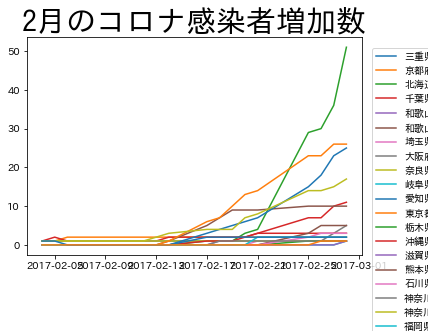

In [0]:
jp_font = {'fontname':'IPAGothic'} # 日本語フォント設定を作成
fig, ax = plt.subplots()

for columns in t_main_df.columns:
  ax.plot(t_main_df.index, t_main_df[columns], label=columns)
ax.set_title('2月のコロナ感染者増加数', fontsize=30, **jp_font) #フォントを指定

fig.legend(bbox_to_anchor=(0.85, 1.0), loc='upper left')
# plt.figure()
plt.rcParams['font.family'] = 'IPAPGothic'
# グラフの表示
plt.savefig('february-corona.png')
# plt.savefig('test.svg',format = 'svg'); # SVG形式ファイルも出力
# files.download("february-corona.png")
plt.show()